# extract syllables

In [1]:
cd ~/Desktop/yushi/

/Users/zangsir/Desktop/yushi


In [2]:
ls

LING461 Measurements.xlsx  plot_ori_pitch.py
batch_interp.py            run-get-pitch.sh*
batch_trim.py              simple_pitch.py
get-pitch-yushi.praat      sounds-dur/
pitcGao_ta.pdf             yushi-notes
pitch/                     yushi-skp2.tab
plot-pitch.py              yushi-spk1.tab


In [40]:
#f=open('yushi-spk1.tab','r').read().split('\n')
f=open('yushi-skp2.tab','r').read().split('\n')

label=f[0].split('\t')
time_stamps=[[i] for i in label]
for line in f[1:]:
    if line!="":
        l=line.split('\t')
        for i in range(len(time_stamps)):
            time_stamps[i].append(l[i])
        
        

In [41]:
time_stamps

[['ta1S', '1.0204', '1.3188'],
 ['ta1L', '2.0519', '2.7136'],
 ['ta2S', '4.0222', '4.2791'],
 ['ta2L', '5.2444', '6.0883'],
 ['ta3S', '7.0753', '7.3094'],
 ['ta3L', '8.2961', '9.4308'],
 ['ta4S', '10.3365', '10.5'],
 ['ta4L', '11.5182', '12.2584']]

In [73]:
pitch[:10]

['132.08325022193463',
 '132.10771817257304',
 '132.18114922345023',
 '132.30362502184914',
 '132.47528181469758',
 '132.69631070121025',
 '132.91770836420713',
 '133.0901618969565',
 '133.2134799641177',
 '133.28752564411332']

In [66]:
pitch_file='pitch/pitcGao_ta.tab'
#pitch_file='pitch/pitcZHAO_hanxianbo_1.tab'
speaker=pitch_file.split('.')[0].split('/')[1]
def get_vec(file):
    time=[]
    pitch=[]
    f=open(file,'r').read().split('\n')
    for line in f[1:]:
        if line!='':
            l=line.split('\t')
            time.append(l[0])
            pitch.append(l[1])
    return time,pitch

In [67]:
time,pitch=get_vec(pitch_file)
print len(time),len(pitch)
pitch_vec=[]
for line in time_stamps:
    label,start,end=line[0],line[1],line[2]
    token_id=speaker+"_"+label
    duration=float(end)-float(start)
    syl_values=[str(round(float(pitch[i]),3)) for i in range(len(pitch)) \
                        if float(time[i])>=float(start) and float(time[i]) <=float(end)]
    syl_values.append(label)
    syl_values.append(token_id)
    syl_values.append(label[-1])
    syl_values.append(str(duration))
    pitch_vec.append(syl_values)

3721 3721


In [74]:
import numpy as np

def normalize(pitch,spk_mean):
    """let's normalize one file for now"""
    #normalize,log,downsample,smooth
    #for this speaker, normalize all files of this spk
    #print pitch[:100],'here'
    pitch_float=[float(i) for i in pitch]
    pitch=np.array(pitch_float)
    log_pitch=np.log2(pitch)
    norm_pitch=log_pitch-spk_mean
    #log_pitch=np.log(norm_pitch)
    #down_pitch=downsample_mix(log_pitch,30)
    return norm_pitch

pitch=[float(i) for i in pitch]
pitch=normalize(pitch,np.mean(np.log2(pitch)))

In [75]:
pitch[:30]

array([-0.67435022, -0.674083  , -0.67328131, -0.67194516, -0.67007456,
       -0.66766949, -0.66526443, -0.66339382, -0.66205767, -0.66125599,
       -0.66098876, -0.66078424, -0.66017071, -0.65914814, -0.65771655,
       -0.65587593, -0.65403532, -0.65260373, -0.65158116, -0.65096762,
       -0.65076311, -0.65091025, -0.65135165, -0.65208732, -0.65311727,
       -0.65444148, -0.65576569, -0.65679563, -0.65753131, -0.65797271])

In [44]:
print pitch_vec[0]

['220.729', '220.649', '220.41', '220.011', '219.454', '218.741', '218.029', '217.477', '217.084', '216.848', '216.77', '216.742', '216.658', '216.518', '216.322', '216.07', '215.819', '215.624', '215.484', '215.401', '215.373', '215.421', '215.565', '215.806', '216.143', '216.577', '217.012', '217.351', '217.593', '217.739', '217.787', '217.817', '217.906', '218.054', '218.262', '218.53', '218.798', '219.006', '219.155', '219.245', '219.275', '219.311', '219.418', '219.598', '219.85', '220.175', '220.5', '220.753', '220.934', '221.043', '221.079', '221.125', '221.263', '221.493', '221.816', '222.232', '222.648', '222.972', '223.204', '223.344', '223.39', '223.421', '223.513', '223.666', '223.881', '224.158', '224.435', '224.651', '224.805', '224.898', '224.928', '224.956', '225.038', '225.176', '225.369', '225.617', '225.865', '226.058', '226.196', '226.279', '226.307', '226.317', '226.345', '226.393', '226.46', '226.547', '226.633', '226.701', '226.749', '226.777', '226.787', '226.78

In [45]:
f=open("syl_pitch_2.csv",'a')
for pv in pitch_vec:
    line=','.join(pv)
    f.write(line)
    f.write('\n')
f.close()

# then, using downsample to derive 30-point pitch contours

In [ ]:
#using downsample.py

# look at downsampled 30-point curves

In [77]:
f=open('downsample_syl.csv','r').read().split('\n')
pitch_vec_total=[]
meta=[]
for line in f:
    if line!="":
        l=line.split(',')
        pitch=[float(i) for i in l[:-6]]
        meta.append(l[-6:])
        pitch_vec_total.append(pitch)

In [78]:
print pitch_vec_total[0]

[0.342, 0.344, 0.343, 0.342, 0.341, 0.339, 0.337, 0.332, 0.327, 0.324, 0.32, 0.313, 0.307, 0.302, 0.298, 0.287, 0.285, 0.291, 0.295, 0.303, 0.313, 0.324, 0.339, 0.358, 0.381, 0.394, 0.408, 0.412, 0.392, 0.362]


In [79]:
meta

[['ta1S', 'pitcGao_ta_ta1S', 'S', '0.2839', '1', 'pitcGao_ta'],
 ['ta1L', 'pitcGao_ta_ta1L', 'L', '0.7395', '1', 'pitcGao_ta'],
 ['ta2S', 'pitcGao_ta_ta2S', 'S', '0.4021', '2', 'pitcGao_ta'],
 ['ta2L', 'pitcGao_ta_ta2L', 'L', '0.5929', '2', 'pitcGao_ta'],
 ['ta3S', 'pitcGao_ta_ta3S', 'S', '0.4218', '3', 'pitcGao_ta'],
 ['ta3L', 'pitcGao_ta_ta3L', 'L', '0.8436', '3', 'pitcGao_ta'],
 ['ta4S', 'pitcGao_ta_ta4S', 'S', '0.3197', '4', 'pitcGao_ta'],
 ['ta4L', 'pitcGao_ta_ta4L', 'L', '0.4473', '4', 'pitcGao_ta'],
 ['ta1S',
  'pitcZHAO_hanxianbo_1_ta1S',
  'S',
  '0.2984',
  '1',
  'pitcZHAO_hanxianbo_1'],
 ['ta1L',
  'pitcZHAO_hanxianbo_1_ta1L',
  'L',
  '0.6617',
  '1',
  'pitcZHAO_hanxianbo_1'],
 ['ta2S',
  'pitcZHAO_hanxianbo_1_ta2S',
  'S',
  '0.2569',
  '2',
  'pitcZHAO_hanxianbo_1'],
 ['ta2L',
  'pitcZHAO_hanxianbo_1_ta2L',
  'L',
  '0.8439',
  '2',
  'pitcZHAO_hanxianbo_1'],
 ['ta3S',
  'pitcZHAO_hanxianbo_1_ta3S',
  'S',
  '0.2341',
  '3',
  'pitcZHAO_hanxianbo_1'],
 ['ta3L',
  'pitcZ

In [80]:
len(pitch)

30

In [81]:
pitch[0]

0.525

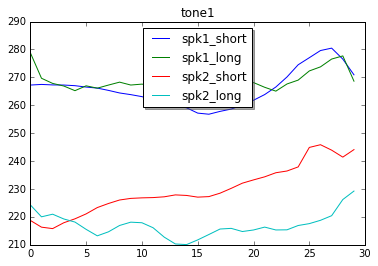

In [60]:
## look at tone 1
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[0],label="spk1_short")
plt.plot(pitch_vec_total[1],label="spk1_long")
plt.plot(pitch_vec_total[8],label="spk2_short")
plt.plot(pitch_vec_total[9],label="spk2_long")

plt.title('tone1')
plt.legend(loc='upper center', shadow=True)

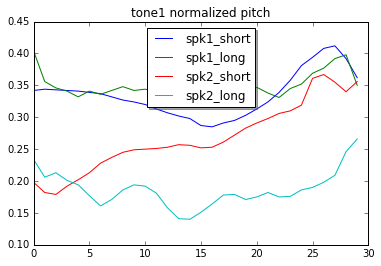

In [85]:
## look at tone 1 pitch normalized
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[0],label="spk1_short")
plt.plot(pitch_vec_total[1],label="spk1_long")
plt.plot(pitch_vec_total[8],label="spk2_short")
plt.plot(pitch_vec_total[9],label="spk2_long")

plt.title('tone1 normalized pitch')
plt.legend(loc='upper center', shadow=True)

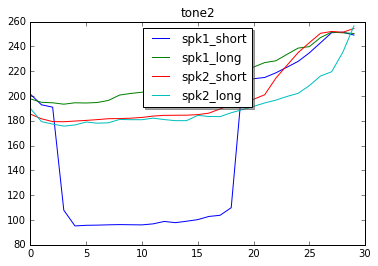

In [61]:
## look at tone 2
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[2],label="spk1_short")
plt.plot(pitch_vec_total[3],label="spk1_long")
plt.plot(pitch_vec_total[10],label="spk2_short")
plt.plot(pitch_vec_total[11],label="spk2_long")

plt.title('tone2')
plt.legend(loc='upper center', shadow=True)

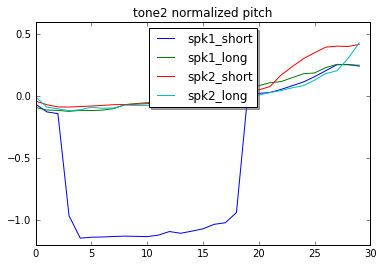

In [86]:
## look at tone 2 normalized
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[2],label="spk1_short")
plt.plot(pitch_vec_total[3],label="spk1_long")
plt.plot(pitch_vec_total[10],label="spk2_short")
plt.plot(pitch_vec_total[11],label="spk2_long")

plt.title('tone2 normalized pitch')
plt.legend(loc='upper center', shadow=True)

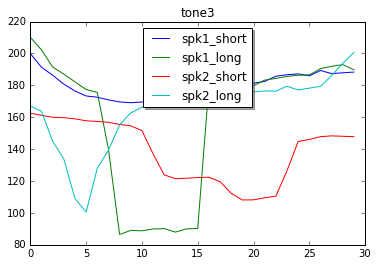

In [62]:
## look at tone 3
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[4],label="spk1_short")
plt.plot(pitch_vec_total[5],label="spk1_long")
plt.plot(pitch_vec_total[12],label="spk2_short")
plt.plot(pitch_vec_total[13],label="spk2_long")

plt.title('tone3')
plt.legend(loc='upper center', shadow=True)

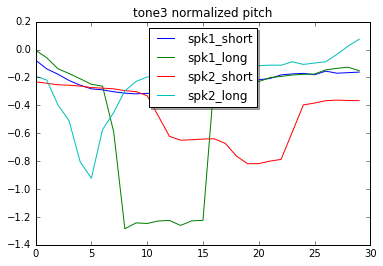

In [87]:
## look at tone 3 normalized
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[4],label="spk1_short")
plt.plot(pitch_vec_total[5],label="spk1_long")
plt.plot(pitch_vec_total[12],label="spk2_short")
plt.plot(pitch_vec_total[13],label="spk2_long")

plt.title('tone3 normalized pitch')
plt.legend(loc='upper center', shadow=True)

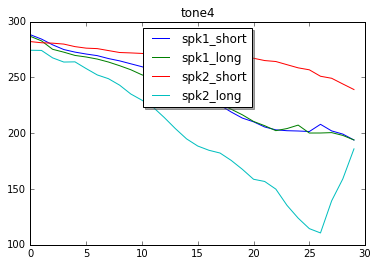

In [63]:
## look at tone 4
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[6],label="spk1_short")
plt.plot(pitch_vec_total[7],label="spk1_long")
plt.plot(pitch_vec_total[14],label="spk2_short")
plt.plot(pitch_vec_total[15],label="spk2_long")

plt.title('tone4')
plt.legend(loc='upper center', shadow=True)

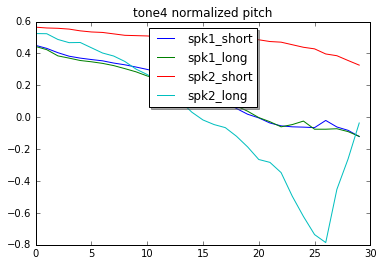

In [88]:
## look at tone 4 normalized
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pitch_vec_total[6],label="spk1_short")
plt.plot(pitch_vec_total[7],label="spk1_long")
plt.plot(pitch_vec_total[14],label="spk2_short")
plt.plot(pitch_vec_total[15],label="spk2_long")

plt.title('tone4 normalized pitch')
plt.legend(loc='upper center', shadow=True)

## convert to R format

0.342,0.344,0.343,0.342,0.341,0.339,0.337,0.332,0.327,0.324,0.32,0.313,0.307,0.302,0.298,0.287,0.285,0.291,0.295,
0.303,0.313,0.324,0.339,0.358,0.381,0.394,0.408,0.412,0.392,0.362,ta1S,pitcGao_ta_ta1S,S,0.2839,1,pitcGao_ta

In [91]:
print pitch_vec_total[0]

[0.342, 0.344, 0.343, 0.342, 0.341, 0.339, 0.337, 0.332, 0.327, 0.324, 0.32, 0.313, 0.307, 0.302, 0.298, 0.287, 0.285, 0.291, 0.295, 0.303, 0.313, 0.324, 0.339, 0.358, 0.381, 0.394, 0.408, 0.412, 0.392, 0.362]


In [92]:
print len(pitch_vec_total),len(meta)

16 16


In [101]:
meta[0]

['ta1S', 'pitcGao_ta_ta1S', 'S', '0.2839', '1', 'pitcGao_ta']

want format: columns: speaker, segment,time_frame,token_id,dur,pitch,tone

In [103]:
header="segment,token_id,duration_type,duration,tone,speaker,time_frame,pitch\n"
outfile='dur_data_col.csv'
f=open(outfile,'w')
f.write(header)
f.close()

f=open(outfile,'a')
for i in range(len(pitch_vec_total)):
    pitch_syl=pitch_vec_total[i]
    #pitch_vect=[str(j) for j in pitch_vec_total[i]]
    #pitch_line=','.join(pitch_vect)
    meta_line=','.join(meta[i])
    for k in range(len(pitch_syl)):
        f.write(meta_line+"," + str(k) + "," +str(pitch_syl[k]))
        f.write('\n')
f.close()
        

In [95]:
pitch_line

'0.525,0.524,0.488,0.468,0.469,0.436,0.403,0.384,0.35,0.302,0.268,0.228,0.167,0.098,0.032,-0.017,-0.046,-0.065,-0.119,-0.186,-0.265,-0.283,-0.347,-0.495,-0.622,-0.736,-0.786,-0.452,-0.262,-0.036'